In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

[3.47 3.45 3.43 3.69]
[3.37 3.37 3.29 3.65]
[2.79 2.91 2.99 2.97]
[3.35 3.23 3.05 3.11]
[2.85 3.03 3.05 3.13]
[2.61 2.57 2.51 2.57]


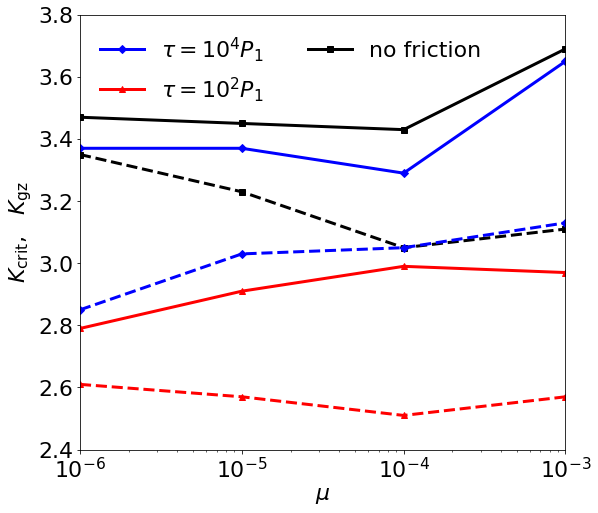

In [125]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])

Kcr0 = np.zeros((4,3))
Kgz0 = np.zeros((4,3))

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,0] = bins[igzmax]
    Kgz0[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,1] = bins[igzmax]
    Kgz0[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,2] = bins[igzmax]
    Kgz0[iii,2] = bins[igzmin]

Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/1p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/1p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]

    


ip = 1

fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(8.7,8))
fig.subplots_adjust(hspace=0.0)

axs.semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs.semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')
axs.semilogx(mu_l,Kcr0[:,ip],'s-',c='k',lw=3,label='no friction')

print(Kcr0[:,ip])
print(Kcr4[:,ip])
print(Kcr2[:,ip])

axs.semilogx(mu_l,Kgz0[:,ip],'s--',c='k',lw=3)
axs.semilogx(mu_l,Kgz4[:,ip],'D--',c='b',lw=3)
axs.semilogx(mu_l,Kgz2[:,ip],'^--',c='r',lw=3)

print(Kgz0[:,ip])
print(Kgz4[:,ip])
print(Kgz2[:,ip])

axs.set_ylim([2.40,3.8])
axs.set_xlim([1e-6,1e-3])

axs.legend(ncol=2,frameon=False)

axs.set_xlabel(r'$\mu$')
axs.set_ylabel(r'$K_{\rm crit}$,   $K_{\rm gz}$')

plt.savefig('./pics/pics-Ks-wRH-rev2.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Ks-wRH-rev2.png',bbox_inches='tight',transparent=True)

[3.45 3.33 3.25 3.45]
[3.37 3.31 3.23 3.39]
[2.77 3.01 2.95 2.71]
[3.37 3.17 3.09 2.67]
[2.91 2.93 2.97 2.59]
[2.59 2.55 2.45 2.31]


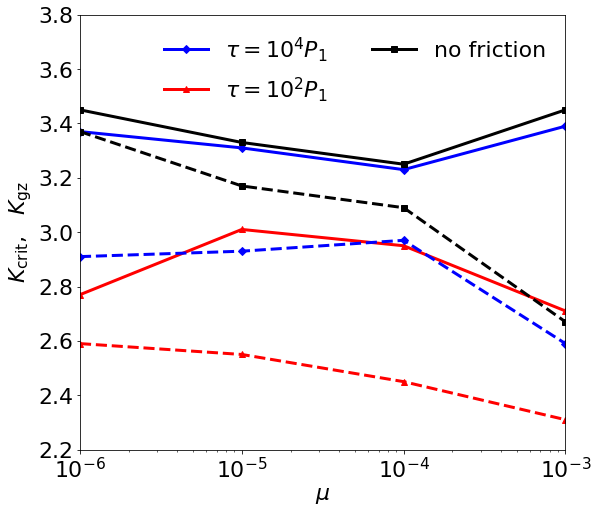

In [126]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])

Kcr0 = np.zeros((4,3))
Kgz0 = np.zeros((4,3))

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/2p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,0] = bins[igzmax]
    Kgz0[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,1] = bins[igzmax]
    Kgz0[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,2] = bins[igzmax]
    Kgz0[iii,2] = bins[igzmin]

Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/2p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/2p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]

    


ip = 1

fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(8.7,8))
fig.subplots_adjust(hspace=0.0)

axs.semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs.semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')
axs.semilogx(mu_l,Kcr0[:,ip],'s-',c='k',lw=3,label='no friction')

print(Kcr0[:,ip])
print(Kcr4[:,ip])
print(Kcr2[:,ip])

axs.semilogx(mu_l,Kgz0[:,ip],'s--',c='k',lw=3)
axs.semilogx(mu_l,Kgz4[:,ip],'D--',c='b',lw=3)
axs.semilogx(mu_l,Kgz2[:,ip],'^--',c='r',lw=3)

print(Kgz0[:,ip])
print(Kgz4[:,ip])
print(Kgz2[:,ip])

axs.set_ylim([2.20,3.8])
axs.set_xlim([1e-6,1e-3])

axs.legend(ncol=2,frameon=False)

axs.set_xlabel(r'$\mu$')
axs.set_ylabel(r'$K_{\rm crit}$,   $K_{\rm gz}$')

plt.savefig('./pics/pics-Ks-N2-rev2.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Ks-N2-rev2.png',bbox_inches='tight',transparent=True)

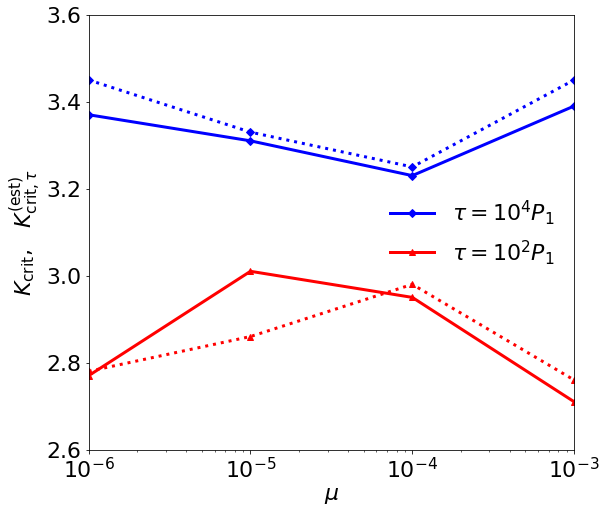

In [186]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])

Kcr0 = np.zeros((4,3))
Kgz0 = np.zeros((4,3))

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/2p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,0] = bins[igzmax]
    Kgz0[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,1] = bins[igzmax]
    Kgz0[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr0[iii,2] = bins[igzmax]
    Kgz0[iii,2] = bins[igzmin]

Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/2p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/2p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]

    


ip = 1

Kest4 = np.array([3.55,3.64,3.90,3.47])
Kest4 = np.minimum(Kest4,Kcr0[:,ip])
Kest2 = np.array([2.78,2.86,2.98,2.76])

fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(8.7,8))
fig.subplots_adjust(hspace=0.0)

axs.semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs.semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')
#axs.semilogx(mu_l,Kcr0[:,ip],'s-',c='k',lw=3,label='no friction')

axs.semilogx(mu_l,Kest4,'D',ls='dotted',c='b',lw=3)
axs.semilogx(mu_l,Kest2,'^',ls='dotted',c='r',lw=3)

axs.set_ylim([2.6,3.6])
axs.set_xlim([1e-6,1e-3])

axs.legend(ncol=1,frameon=False)

axs.set_xlabel(r'$\mu$')
axs.set_ylabel(r'$K_{\rm crit}$,   $K_{{\rm crit},\tau}^{\rm (est)}$')

plt.savefig('./pics/pics-Kcrit-est-N2-rev2.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Kcrit-est-N2-rev2.png',bbox_inches='tight',transparent=True)

# 3 Planets

[4.985 4.985 4.865 4.505]
[3.73 3.85 3.95 3.37]
[4.955 4.745 4.235 3.395]
[3.27 3.23 3.17 2.85]
[4.985 4.985 4.625 4.985]
[4.925 4.655 4.565 3.905]


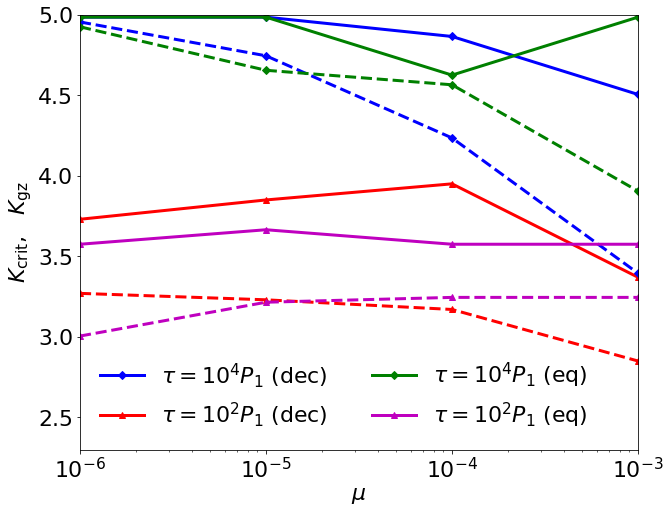

In [139]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])


Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]


    
    
Kcr4eq = np.zeros((4,3))
Kgz4eq = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt4.npy'%(6-iii))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,0] = bins[igzmax]
    Kgz4eq[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,1] = bins[igzmax]
    Kgz4eq[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,2] = bins[igzmax]
    Kgz4eq[iii,2] = bins[igzmin]


Kcr2eq = np.zeros((4,3))
Kgz2eq = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt2.npy'%(6-iii))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2eq[iii,0] = bins[igzmax]
    Kgz2eq[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2eq[iii,1] = bins[igzmax]
    Kgz2eq[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,2] = bins[igzmax]
    Kgz4eq[iii,2] = bins[igzmin]
    
ip = 1

fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(10,8))
fig.subplots_adjust(hspace=0.0)

axs.semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$ (dec)')
axs.semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$ (dec)')

print(Kcr4[:,ip])
print(Kcr2[:,ip])

axs.semilogx(mu_l,Kgz4[:,ip],'D--',c='b',lw=3)
axs.semilogx(mu_l,Kgz2[:,ip],'^--',c='r',lw=3)

print(Kgz4[:,ip])
print(Kgz2[:,ip])


axs.semilogx(mu_l,Kcr4eq[:,ip],'D-',c='g',lw=3,label=r'$\tau = 10^4P_1$ (eq)')
axs.semilogx(mu_l,Kcr2eq[:,ip],'^-',c='m',lw=3,label=r'$\tau = 10^2P_1$ (eq)')

print(Kcr4eq[:,ip])
#print(Kcr2eq[:,ip])

axs.semilogx(mu_l,Kgz4eq[:,ip],'D--',c='g',lw=3)
axs.semilogx(mu_l,Kgz2eq[:,ip],'^--',c='m',lw=3)

print(Kgz4eq[:,ip])
#print(Kgz2eq[:,ip])


axs.set_ylim([2.3,5.0])
axs.set_xlim([1e-6,1e-3])

axs.legend(ncol=2,frameon=False)

axs.set_xlabel(r'$\mu$')
axs.set_ylabel(r'$K_{\rm crit}$,   $K_{\rm gz}$')

#plt.savefig('./pics/pics-Ks-N3-rev2-m.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-Ks-N3-rev2-m.png',bbox_inches='tight',transparent=True)

[3.73 3.85 3.95 3.37]
[3.27 3.23 3.17 2.85]
[3.63 3.67 3.59 3.09]
[4.93 4.67 4.55 3.91]
[3.01 3.21 3.23 2.97]


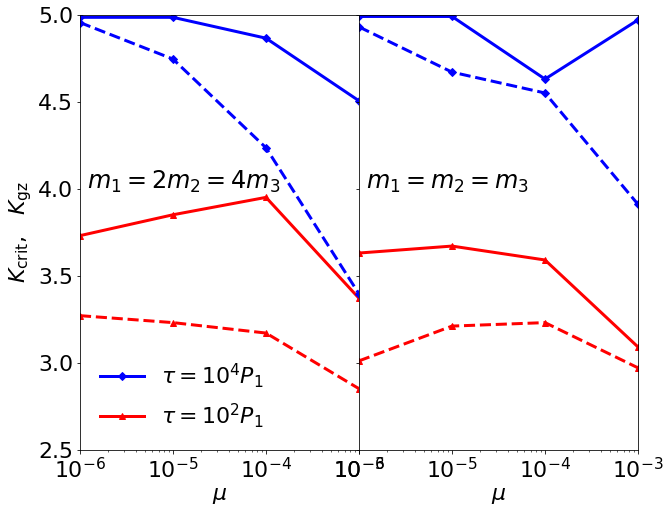

In [189]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])


Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]


    
    
Kcr4eq = np.zeros((4,3))
Kgz4eq = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt4.npy'%(6-iii))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,0] = bins[igzmax]
    Kgz4eq[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,1] = bins[igzmax]
    Kgz4eq[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,2] = bins[igzmax]
    Kgz4eq[iii,2] = bins[igzmin]


Kcr2eq = np.zeros((4,3))
Kgz2eq = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt2.npy'%(6-iii))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2eq[iii,0] = bins[igzmax]
    Kgz2eq[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2eq[iii,1] = bins[igzmax]
    Kgz2eq[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,2] = bins[igzmax]
    Kgz4eq[iii,2] = bins[igzmin]
    
ip = 1

fig,axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,8))
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.0)

axs[0].semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs[0].semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')

#print(Kcr4[:,ip])
print(Kcr2[:,ip])

axs[0].semilogx(mu_l,Kgz4[:,ip],'D--',c='b',lw=3)
axs[0].semilogx(mu_l,Kgz2[:,ip],'^--',c='r',lw=3)

#print(Kgz4[:,ip])
print(Kgz2[:,ip])


axs[1].semilogx(mu_l,Kcr4eq[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs[1].semilogx(mu_l,Kcr2eq[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')

#print(Kcr4eq[:,ip])
print(Kcr2eq[:,ip])

axs[1].semilogx(mu_l,Kgz4eq[:,ip],'D--',c='b',lw=3)
axs[1].semilogx(mu_l,Kgz2eq[:,ip],'^--',c='r',lw=3)

print(Kgz4eq[:,ip])
print(Kgz2eq[:,ip])


axs[0].set_ylim([2.5,5.0])
axs[0].set_xlim([1e-6,1e-3])

axs[0].text(1.2e-6,4.0,r'$m_1=2m_2=4m_3$',fontsize=24)
axs[1].text(1.2e-6,4.0,r'$m_1=m_2=m_3$',fontsize=24)

axs[0].legend(ncol=1,frameon=False)

axs[0].set_xlabel(r'$\mu$')
axs[1].set_xlabel(r'$\mu$')
axs[0].set_ylabel(r'$K_{\rm crit}$,   $K_{\rm gz}$')



plt.savefig('./pics/pics-Ks-N3-rev2-m.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Ks-N3-rev2-m.png',bbox_inches='tight',transparent=True)

0.28999999999999915
0.52


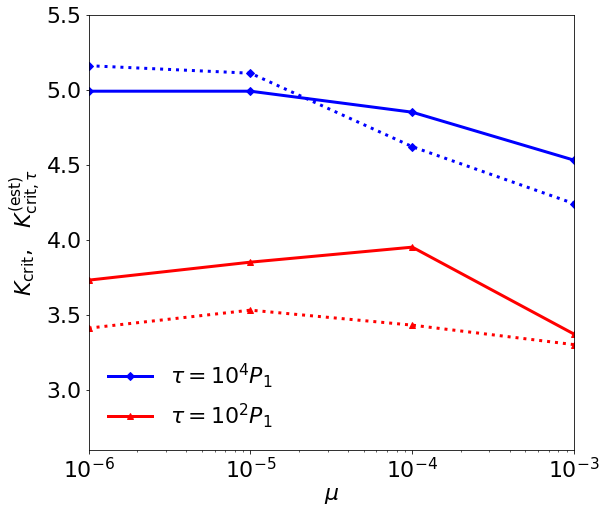

In [167]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])

Kcr0 = np.zeros((4,3))
Kgz0 = np.zeros((4,3))

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/res/3p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr0[iii,0] = bins[igzmax]
    Kgz0[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr0[iii,1] = bins[igzmax]
    Kgz0[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr0[iii,2] = bins[igzmax]
    Kgz0[iii,2] = bins[igzmin]

Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]

    


ip = 1

Kest4 = np.array([5.16,5.11,4.62,4.24])
Kest2 = np.array([3.41,3.53,3.43,3.30])

fig,axs = plt.subplots(1,1, sharex=True, sharey=False, figsize=(8.7,8))
fig.subplots_adjust(hspace=0.0)

axs.semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs.semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')
#axs.semilogx(mu_l,Kcr0[:,ip],'s-',c='k',lw=3,label='no friction')

axs.semilogx(mu_l,Kest4,'D',ls='dotted',c='b',lw=3)
axs.semilogx(mu_l,Kest2,'^',ls='dotted',c='r',lw=3)

print(np.max(np.abs(Kest4-Kcr4[:,ip])))
print(np.max(np.abs(Kest2-Kcr2[:,ip])))

axs.set_ylim([2.6,5.5])
axs.set_xlim([1e-6,1e-3])

axs.legend(ncol=1,frameon=False)

axs.set_xlabel(r'$\mu$')
axs.set_ylabel(r'$K_{\rm crit}$,   $K_{{\rm crit},\tau}^{\rm (est)}$')

plt.savefig('./pics/pics-Kcrit-est-N3-rev2.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Kcrit-est-N3-rev2.png',bbox_inches='tight',transparent=True)

[4.985 4.985 4.865 4.505]
[3.73 3.85 3.95 3.37]
[4.99 4.99 4.63 4.97]
[3.63 3.67 3.59 3.09]


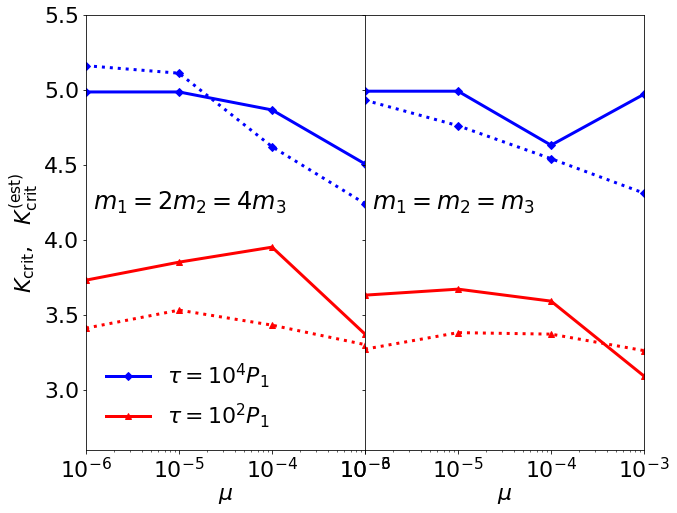

In [191]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])


Kcr4 = np.zeros((4,3))
Kgz4 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,0] = bins[igzmax]
    Kgz4[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,1] = bins[igzmax]
    Kgz4[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4[iii,2] = bins[igzmax]
    Kgz4[iii,2] = bins[igzmin]
    
    
Kcr2 = np.zeros((4,3))
Kgz2 = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/3p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,0] = bins[igzmax]
    Kgz2[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,1] = bins[igzmax]
    Kgz2[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2[iii,2] = bins[igzmax]
    Kgz2[iii,2] = bins[igzmin]


    
    
Kcr4eq = np.zeros((4,3))
Kgz4eq = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt4.npy'%(6-iii))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,0] = bins[igzmax]
    Kgz4eq[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,1] = bins[igzmax]
    Kgz4eq[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,2] = bins[igzmax]
    Kgz4eq[iii,2] = bins[igzmin]


Kcr2eq = np.zeros((4,3))
Kgz2eq = np.zeros((4,3))

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data-rev2/pt5-res/p3m%1dt2.npy'%(6-iii))
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    
    dpc = 0.05
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2eq[iii,0] = bins[igzmax]
    Kgz2eq[iii,0] = bins[igzmin]

    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr2eq[iii,1] = bins[igzmax]
    Kgz2eq[iii,1] = bins[igzmin]
    
    dpc = 0.3
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    Kcr4eq[iii,2] = bins[igzmax]
    Kgz4eq[iii,2] = bins[igzmin]
    
ip = 1


Kest4 = np.array([5.16,5.11,4.62,4.24])
Kest2 = np.array([3.41,3.53,3.43,3.30])

Kest4eq = np.array([4.93,4.76,4.54,4.31])
Kest2eq = np.array([3.27,3.38,3.37,3.26])

fig,axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,8))
fig.subplots_adjust(hspace=0.0)
fig.subplots_adjust(wspace=0.0)

axs[0].semilogx(mu_l,Kcr4[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs[0].semilogx(mu_l,Kcr2[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')

print(Kcr4[:,ip])
print(Kcr2[:,ip])

axs[0].semilogx(mu_l,Kest4,'D',ls='dotted',c='b',lw=3)
axs[0].semilogx(mu_l,Kest2,'^',ls='dotted',c='r',lw=3)


axs[1].semilogx(mu_l,Kcr4eq[:,ip],'D-',c='b',lw=3,label=r'$\tau = 10^4P_1$')
axs[1].semilogx(mu_l,Kcr2eq[:,ip],'^-',c='r',lw=3,label=r'$\tau = 10^2P_1$')

print(Kcr4eq[:,ip])
print(Kcr2eq[:,ip])

axs[1].semilogx(mu_l,Kest4eq,'D',ls='dotted',c='b',lw=3)
axs[1].semilogx(mu_l,Kest2eq,'^',ls='dotted',c='r',lw=3)

#print(Kgz4eq[:,ip])
#print(Kgz2eq[:,ip])


axs[0].set_ylim([2.6,5.5])
axs[0].set_xlim([1e-6,1e-3])

axs[0].text(1.2e-6,4.2,r'$m_1=2m_2=4m_3$',fontsize=24)
axs[1].text(1.2e-6,4.2,r'$m_1=m_2=m_3$',fontsize=24)

axs[0].legend(ncol=1,frameon=False)

axs[0].set_xlabel(r'$\mu$')
axs[1].set_xlabel(r'$\mu$')
axs[0].set_ylabel(r'$K_{\rm crit}$,   $K^{\rm (est)}_{\rm crit}$')



plt.savefig('./pics/pics-Kcrit-est-N3-rev2-m.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-Kcrit-est-N3-rev2-m.png',bbox_inches='tight',transparent=True)